In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data: IMDB 5000 DATA

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
#Add new columns using gross and budget: gross_margin, gross_margin_ratio, success_failure
df['gross_margin'] = df['gross'] - df['budget']

In [6]:
df["gross_margin_ratio"] = (df["gross_margin"] / df["gross"])*100

In [7]:
df['success_failure'] = np.where(df['gross_margin_ratio'] >= 0, 1, 0)

In [8]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697,1
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,23.335284,1
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,-59192738.0,-29.477389,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,208991599.0,45.532772,1
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,51956980.0,17.206749,1


In [9]:
df.describe(include = "all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,3.891000e+03,3.891000e+03,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,2118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,5.844717e+06,-5.350237e+03,0.406702
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,2.261794e+08,1.015627e+05,0.491267
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10,-5.555456e+06,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,-1.026518e+07,-1.217068e+02,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,8.516360e+05,6.599253e+00,0.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,2.475147e+07,5.512759e+01,1.000000


In [10]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
gross_margin                 3891
gross_margin_r

In [11]:
#Check how many nulls in each column
df.isnull().sum(axis=0)

color                          19
director_name                 104
num_critic_for_reviews         50
duration                       15
director_facebook_likes       104
actor_3_facebook_likes         23
actor_2_name                   13
actor_1_facebook_likes          7
gross                         884
genres                          0
actor_1_name                    7
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   23
facenumber_in_poster           13
plot_keywords                 153
movie_imdb_link                 0
num_user_for_reviews           21
language                       12
country                         5
content_rating                303
budget                        492
title_year                    108
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  329
movie_facebook_likes            0
gross_margin                 1152
gross_margin_r

In [12]:
#check the data type
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [13]:
df['director_name'].value_counts()

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            17
Tim Burton              16
Steven Soderbergh       16
Spike Lee               16
Renny Harlin            15
Oliver Stone            14
Joel Schumacher         13
Robert Zemeckis         13
John Carpenter          13
Sam Raimi               13
Barry Levinson          13
Michael Bay             13
Ron Howard              13
Robert Rodriguez        13
Brian De Palma          12
Kevin Smith             12
Tony Scott              12
Wes Craven              12
Shawn Levy              12
Peter Jackson           12
Richard Donner          12
Rob Cohen               11
Chris Columbus          11
Francis Ford Coppola    11
Richard Linklater       11
Rob Reiner              11
                        ..
Stewart Hendler          1
Clark Baker              1
Nancy Walker             1
Vicente Amorim           1
Mark Tonderai            1
Morgan Neville           1
K

In [14]:
#Delete row with null value
df = df.dropna(how='any',axis=0)
df.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
gross_margin                 3756
gross_margin_r

In [15]:
df["duration"].value_counts()

101.0    113
100.0    104
98.0     103
95.0      95
99.0      93
107.0     92
106.0     91
90.0      90
97.0      90
110.0     88
104.0     87
94.0      84
96.0      84
93.0      81
102.0     81
109.0     81
91.0      81
103.0     78
105.0     76
108.0     75
92.0      71
112.0     69
88.0      65
115.0     65
113.0     62
89.0      62
120.0     60
118.0     60
111.0     59
116.0     56
        ... 
185.0      1
300.0      1
330.0      1
69.0       1
293.0      1
183.0      1
195.0      1
219.0      1
166.0      1
227.0      1
187.0      1
200.0      1
280.0      1
236.0      1
66.0       1
196.0      1
325.0      1
271.0      1
167.0      1
190.0      1
192.0      1
197.0      1
216.0      1
240.0      1
63.0       1
180.0      1
37.0       1
53.0       1
289.0      1
225.0      1
Name: duration, Length: 151, dtype: int64

In [16]:
df["gross_margin_ratio"].value_counts()

 23.876620        3
-329.002662       3
 99.361702        3
 73.704662        3
-150.000000       3
-592.818366       3
 5.068194         3
-377.542941       2
-233.334349       2
 45.567030        2
-88.686768        2
 59.654179        2
-358.253922       2
 86.058302        2
 99.729311        2
-47.784902        2
 55.846617        2
 1.192540         2
-161.161229       2
-70.628062        2
-36387.329481     2
 52.771131        2
 1.604415         2
-307.743964       2
 14.933722        2
-115.361274       2
-4851.328441      2
 46.762409        2
 88.085931        2
-97.958967        2
                 ..
 75.794240        1
 55.311091        1
 27.871340        1
 34.127349        1
 6.108916         1
-173.836935       1
 48.722152        1
 18.826602        1
 81.286454        1
-66.879922        1
 79.286500        1
-11.274343        1
-539711.066127    1
 57.209987        1
-66.491347        1
 56.927236        1
-6379.893272      1
 74.008608        1
-26.342037        1


In [17]:
#Sort the data based on gross_margin_ratio in Descending order
df.sort_values('gross_margin_ratio', axis=0, ascending=False, inplace=True)

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,R,1.500000e+04,2007.0,109.0,6.3,1.85,12000,1.079023e+08,9.998610e+01,1
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,Unrated,2.180000e+02,2003.0,20.0,7.2,1.37,754,5.917960e+05,9.996318e+01,1
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,R,6.000000e+04,1999.0,170.0,6.4,1.33,0,1.404701e+08,9.995730e+01,1
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,R,2.500000e+04,1995.0,111.0,6.6,1.85,265,1.022160e+07,9.975602e+01,1
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,R,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,R,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,R,7.000000e+03,1992.0,20.0,6.9,1.37,0,2.033920e+06,9.965702e+01,1
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,R,1.000000e+05,2015.0,40.0,4.2,1.85,0,2.265782e+07,9.956059e+01,1
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,PG,6.500000e+04,2004.0,0.0,7.3,1.78,0,1.146437e+07,9.943622e+01,1
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,R,3.000000e+05,1978.0,742.0,7.9,2.35,12000,4.670000e+07,9.936170e+01,1


In [19]:
#Check the relationship between duration and gross_margin_ratio
df_groupby_gmr_dur =df.groupby(['duration'])['gross_margin_ratio'].count()

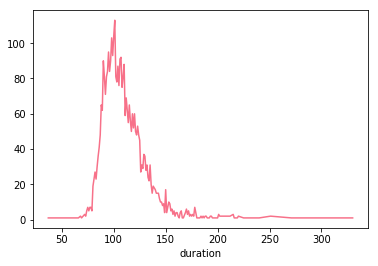

In [20]:
df_groupby_gmr_dur.plot()

In [21]:
df_groupby_gmr_dur =df.groupby(['gross_margin_ratio'])['duration'].count()

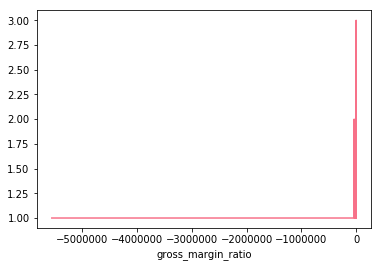

In [22]:
df_groupby_gmr_dur.plot()

In [23]:
#Assign the data to X and y
X = df.duration.values.reshape(-1, 1)
y = df.gross_margin_ratio.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (3756, 1) (3756, 1)


Text(0, 0.5, 'gross_margin_ratio')

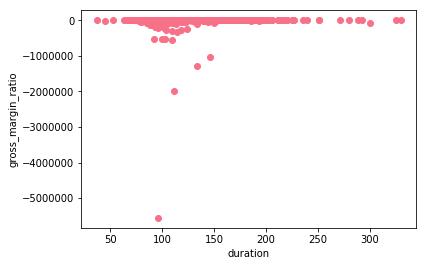

In [24]:
plt.scatter(X, y)
plt.xlabel("duration")
plt.ylabel("gross_margin_ratio")

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
model.coef_

array([[15.81506697]])

In [28]:
model.intercept_

array([-6664.18305281])

In [29]:
#Transform min and max values
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X value: {x_min}")
print(f"Max X value: {x_max}")

Min X value: [[37.]]
Max X value: [[330.]]


In [30]:
#Calculate y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

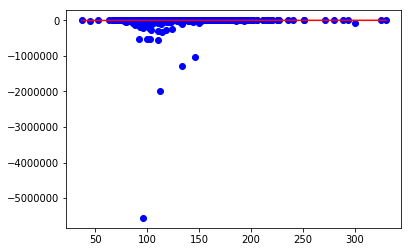

In [31]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [32]:
corrdf = df.corr()

In [33]:
corrdf

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226,0.039029,0.025072,0.164583
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303,0.008296,0.003500,0.008156
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962,0.024455,0.006255,0.051390
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508,0.052423,0.013626,0.072632
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300,0.027904,0.012979,0.023870
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933,0.208033,0.036075,0.411722
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751,0.126327,0.025334,0.284287
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564,0.043862,0.017764,0.047856
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185,0.011510,-0.024291,0.001422
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465,0.097406,0.027861,0.218140


In [34]:
export_csv = corrdf.to_csv(r'C:/Users/So Jung Lee/Data Module/Project 3/export_dataframe.csv', index=None, header=True)

In [37]:
df['imdb_id'] = [x.split('/')[4] for x in df['movie_imdb_link']]

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_margin,gross_margin_ratio,success_failure,imdb_id
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,1.500000e+04,2007.0,109.0,6.3,1.85,12000,1.079023e+08,9.998610e+01,1,tt1179904
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,2.180000e+02,2003.0,20.0,7.2,1.37,754,5.917960e+05,9.996318e+01,1,tt0390538
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,6.000000e+04,1999.0,170.0,6.4,1.33,0,1.404701e+08,9.995730e+01,1,tt0185937
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,2.500000e+04,1995.0,111.0,6.6,1.85,265,1.022160e+07,9.975602e+01,1,tt0112585
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1,tt0072271
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,8.353200e+04,1974.0,371.0,7.5,1.85,0,3.077547e+07,9.972931e+01,1,tt0072271
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,7.000000e+03,1992.0,20.0,6.9,1.37,0,2.033920e+06,9.965702e+01,1,tt0104815
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,1.000000e+05,2015.0,40.0,4.2,1.85,0,2.265782e+07,9.956059e+01,1,tt2309260
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,6.500000e+04,2004.0,0.0,7.3,1.78,0,1.146437e+07,9.943622e+01,1,tt0390521
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,3.000000e+05,1978.0,742.0,7.9,2.35,12000,4.670000e+07,9.936170e+01,1,tt0077651


# Data: Oscar Award

In [25]:
df1 = pd.read_csv("data_csv.csv")

In [26]:
df1

,year,category,winner,entity
0,1927,ACTOR,False,Richard Barthelmess
1,1927,ACTOR,True,Emil Jannings
2,1927,ACTRESS,False,Louise Dresser
3,1927,ACTRESS,True,Janet Gaynor
4,1927,ACTRESS,False,Gloria Swanson
5,1927,ART DIRECTION,False,Rochus Gliese
6,1927,ART DIRECTION,True,William Cameron Menzies
7,1927,ART DIRECTION,False,Harry Oliver
8,1927,CINEMATOGRAPHY,False,George Barnes
9,1927,CINEMATOGRAPHY,True,Charles Rosher


# Data: IMDB 45000 DATA

In [39]:
df2 = pd.read_csv("movies_metadata_imdb_45000.csv")

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,FALSE,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,12/15/1995,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,FALSE,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,12/15/1995,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,FALSE,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,12/22/1995,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,FALSE,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,12/22/1995,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,11/16/1995,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [41]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [43]:
df2.describe(include = "all")

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43371,44307,...,17336,NaN,NaN,1931,6,20283,42275,2,NaN,NaN
top,FALSE,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,...,1/1/2008,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


In [44]:
df2.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [45]:
df2.isnull().sum(axis=0)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [50]:
df2.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [52]:
#Convert object data type of budget and popularity as numeric
df2['budget'] = pd.to_numeric(df2['budget'], errors = 'coerce')

In [54]:
df2['popularity'] = pd.to_numeric(df2['popularity'], errors = 'coerce')

In [55]:
df2.dtypes

adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [56]:
df2['gross_margin'] = df2['revenue'] - df2['budget']

In [58]:
df2["gross_margin_ratio"] = (df2["gross_margin"] / df2["revenue"])*100

In [59]:
df2['success_failure'] = np.where(df2['gross_margin_ratio'] >= 0, 1, 0)

In [60]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,gross_margin,gross_margin_ratio,success_failure
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,343554033.0,91.969033,1
1,FALSE,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,197797249.0,75.266103,1
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0.0,NaN,0
3,FALSE,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,65452156.0,80.356567,1
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,76578911.0,100.000000,1
5,FALSE,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,127436818.0,67.989213,1
6,FALSE,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,-58000000.0,-inf,0
7,FALSE,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,0.0,NaN,0
8,FALSE,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,29350171.0,45.610090,1
9,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,294194034.0,83.531805,1


In [61]:
corrdf2 = df2.corr()

In [62]:
corrdf2

,budget,popularity,revenue,runtime,vote_average,vote_count,gross_margin,gross_margin_ratio,success_failure
budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,0.614339,0.008015,0.396974
popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,0.474264,0.010810,0.385208
revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,0.976896,0.013965,0.435840
runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,0.083189,0.014118,0.138080
vote_average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.078916,0.031051,0.134773
vote_count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,0.775756,0.013064,0.426351
gross_margin,0.614339,0.474264,0.976896,0.083189,0.078916,0.775756,1.000000,0.014399,0.405082
gross_margin_ratio,0.008015,0.010810,0.013965,0.014118,0.031051,0.013064,0.014399,1.000000,0.056525
success_failure,0.396974,0.385208,0.435840,0.138080,0.134773,0.426351,0.405082,0.056525,1.000000


In [82]:
df_suffix = pd.merge(df, df2, left_on='imdb_id', right_on='imdb_id', how='outer', suffixes=('_left', '_right'))

In [83]:
df_suffix

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres_left,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,gross_margin_right,gross_margin_ratio_right,success_failure_right
0,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What Happens When You Sleep?,Paranormal Activity,False,5.9,1351.0,193340800.0,99.992242,1.0
1,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Tarnation,False,7.5,22.0,1161796.0,99.981239,1.0
2,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,False,6.3,1090.0,247940000.0,99.975806,1.0
3,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes the Best Friends Are the Ones You've...,The Brothers McMullen,False,6.3,23.0,0.0,NaN,0.0
4,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who will survive and what will be left of them?,The Texas Chain Saw Massacre,False,7.1,617.0,30774000.0,99.724554,1.0
5,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who will survive and what will be left of them?,The Texas Chain Saw Massacre,False,7.1,617.0,30774000.0,99.724554,1.0
6,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,False,6.6,243.0,1820920.0,89.220548,1.0
7,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every School Has Its Spirit,The Gallows,False,4.9,370.0,42564410.0,99.765613,1.0
8,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,False,6.6,520.0,28510078.0,99.772529,1.0
9,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Night He Came Home,Halloween,False,7.4,1066.0,69700000.0,99.571429,1.0


In [84]:
df_suffix.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres_left', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget_left', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'gross_margin_left', 'gross_margin_ratio_left', 'success_failure_left',
       'imdb_id', 'adult', 'belongs_to_collection', 'budget_right',
       'genres_right', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video'

In [85]:
df_suffix.count()

color                         3757
director_name                 3757
num_critic_for_reviews        3757
duration                      3757
director_facebook_likes       3757
actor_3_facebook_likes        3757
actor_2_name                  3757
actor_1_facebook_likes        3757
gross                         3757
genres_left                   3757
actor_1_name                  3757
movie_title                   3757
num_voted_users               3757
cast_total_facebook_likes     3757
actor_3_name                  3757
facenumber_in_poster          3757
plot_keywords                 3757
movie_imdb_link               3757
num_user_for_reviews          3757
language                      3757
country                       3757
content_rating                3757
budget_left                   3757
title_year                    3757
actor_2_facebook_likes        3757
imdb_score                    3757
aspect_ratio                  3757
movie_facebook_likes          3757
gross_margin_left   

In [86]:
df_suffix.isnull().sum(axis=0)

color                        41828
director_name                41828
num_critic_for_reviews       41828
duration                     41828
director_facebook_likes      41828
actor_3_facebook_likes       41828
actor_2_name                 41828
actor_1_facebook_likes       41828
gross                        41828
genres_left                  41828
actor_1_name                 41828
movie_title                  41828
num_voted_users              41828
cast_total_facebook_likes    41828
actor_3_name                 41828
facenumber_in_poster         41828
plot_keywords                41828
movie_imdb_link              41828
num_user_for_reviews         41828
language                     41828
country                      41828
content_rating               41828
budget_left                  41828
title_year                   41828
actor_2_facebook_likes       41828
imdb_score                   41828
aspect_ratio                 41828
movie_facebook_likes         41828
gross_margin_left   

In [101]:
df_combined = df_suffix.loc [:, ['color', 'movie_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 
                'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                'cast_total_facebook_likes', 'movie_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 
                'num_voted_users', 'imdb_id', 'genres_left','language', 'country', 'content_rating', 'production_companies', 
                'runtime', 'vote_average', 'vote_count', 'facenumber_in_poster', 'duration', 'gross', 'budget_left', 
                'gross_margin_left', 'gross_margin_ratio_left', 'success_failure_left', 'imdb_score', 'aspect_ratio', 
                'popularity', 'release_date']]

In [102]:
df_combined

,color,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,success_failure_left,imdb_score,aspect_ratio,popularity,release_date
0,Color,Paranormal Activity,Oren Peli,Micah Sloat,Ashley Palmer,Amber Armstrong,110.0,189.0,109.0,21.0,...,84.0,107917283.0,15000.0,107902283.0,99.986100,1.0,6.3,1.85,12.706424,9/14/2007
1,Color,Tarnation,Jonathan Caouette,Greg Ayres,Jonathan Caouette,Renee Leblanc,20.0,58.0,20.0,0.0,...,88.0,592014.0,218.0,591796.0,99.963177,1.0,7.2,1.37,1.620207,10/19/2003
2,Black and White,The Blair Witch Project,Daniel Myrick,Heather Donahue,Joshua Leonard,Michael C. Williams,19.0,170.0,170.0,39.0,...,81.0,140530114.0,60000.0,140470114.0,99.957305,1.0,6.4,1.33,14.838386,7/14/1999
3,Color,The Brothers McMullen,Edward Burns,Shari Albert,Michael McGlone,Maxine Bahns,0.0,138.0,111.0,73.0,...,98.0,10246600.0,25000.0,10221600.0,99.756017,1.0,6.6,1.85,2.039196,8/9/1995
4,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,83532.0,30775468.0,99.729311,1.0,7.5,1.85,15.526413,10/1/1974
5,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,83532.0,30775468.0,99.729311,1.0,7.5,1.85,15.526413,10/1/1974
6,Color,El Mariachi,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0.0,121.0,20.0,6.0,...,81.0,2040920.0,7000.0,2033920.0,99.657017,1.0,6.9,1.37,9.972591,9/4/1992
7,Color,The Gallows,Travis Cluff,Pfeifer Brown,Cassidy Gifford,Reese Mishler,3.0,220.0,40.0,7.0,...,81.0,22757819.0,100000.0,22657819.0,99.560591,1.0,4.2,1.85,7.515050,7/10/2015
8,Color,Super Size Me,Morgan Spurlock,Chemeeka Walker,Amanda Kearsan,Amelia Giancarlo,293.0,0.0,0.0,0.0,...,100.0,11529368.0,65000.0,11464368.0,99.436222,1.0,7.3,1.78,5.266103,1/17/2004
9,Color,Halloween,John Carpenter,Jamie Lee Curtis,Donald Pleasence,P.J. Soles,0.0,2000.0,742.0,598.0,...,101.0,47000000.0,300000.0,46700000.0,99.361702,1.0,7.9,2.35,13.672759,10/25/1978


In [103]:
corrdf_combined = df_combined.corr() 

In [104]:
corrdf_combined

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,runtime,...,facenumber_in_poster,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,success_failure_left,imdb_score,aspect_ratio,popularity
director_facebook_likes,1.000000,0.089625,0.116054,0.117403,0.118541,0.161956,0.175106,0.217087,0.299603,0.195271,...,-0.048069,0.180626,0.138348,0.018166,0.024455,0.006255,0.051392,0.192267,0.037519,0.109223
actor_1_facebook_likes,0.089625,1.000000,0.391185,0.252415,0.944815,0.130334,0.166048,0.121986,0.179639,0.087159,...,0.057449,0.083696,0.144028,0.016427,0.027902,0.012974,0.023775,0.093696,0.057013,0.075138
actor_2_facebook_likes,0.116054,0.391185,1.000000,0.553757,0.643003,0.232794,0.253167,0.187054,0.244859,0.130225,...,0.073149,0.128984,0.252856,0.035722,0.042218,0.016735,0.055548,0.102452,0.064008,0.136818
actor_3_facebook_likes,0.117403,0.252415,0.553757,1.000000,0.489798,0.271515,0.252788,0.205353,0.267769,0.125029,...,0.106206,0.125813,0.299869,0.039969,0.052422,0.013625,0.072592,0.065572,0.046378,0.167597
cast_total_facebook_likes,0.118541,0.944815,0.643003,0.489798,1.000000,0.205597,0.236592,0.178725,0.249167,0.122410,...,0.080752,0.120245,0.235618,0.028690,0.043859,0.017758,0.047751,0.106907,0.069024,0.125640
movie_facebook_likes,0.161956,0.130334,0.232794,0.271515,0.205597,1.000000,0.705235,0.370503,0.517779,0.217503,...,0.015255,0.215360,0.366946,0.052498,0.060621,0.015615,0.141545,0.281221,0.110186,0.318565
num_critic_for_reviews,0.175106,0.166048,0.253167,0.252788,0.236592,0.705235,1.000000,0.563736,0.592524,0.231289,...,-0.034217,0.228749,0.464192,0.104727,0.039022,0.025060,0.164354,0.348044,0.180359,0.330136
num_user_for_reviews,0.217087,0.121986,0.187054,0.205353,0.178725,0.370503,0.563736,1.000000,0.778903,0.357730,...,-0.080857,0.351667,0.544680,0.070383,0.097398,0.027852,0.217958,0.325114,0.098214,0.320406
num_voted_users,0.299603,0.179639,0.244859,0.267769,0.249167,0.517779,0.592524,0.778903,1.000000,0.348925,...,-0.032094,0.339671,0.624949,0.065938,0.126317,0.025325,0.284086,0.482511,0.084738,0.389961
runtime,0.195271,0.087159,0.130225,0.125029,0.122410,0.217503,0.231289,0.357730,0.348925,1.000000,...,0.023913,0.929366,0.247927,0.080019,-0.002941,-0.001947,0.006916,0.401393,0.163400,0.131353


In [105]:
export_csv = corrdf_combined.to_csv(r'C:/Users/So Jung Lee/Data Module/Project 3/export_dataframe1.csv', index=None, header=True)

In [107]:
# Really high correlation between cast_total_facebook_likes and actor_1_facebook_likes: correlation r = .945
#If we use these two independent variables in a regression model, this correlation is a problem 
#because independent variables should be independent.
#Due to multicollinearity, we drop cast_total_facebook_likes item.
#We keep actor_1_facebook_likes item because we would test the effect of actor power later.

df_combined.drop(['cast_total_facebook_likes'], axis=1)

,color,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,success_failure_left,imdb_score,aspect_ratio,popularity,release_date
0,Color,Paranormal Activity,Oren Peli,Micah Sloat,Ashley Palmer,Amber Armstrong,110.0,189.0,109.0,21.0,...,84.0,107917283.0,15000.0,107902283.0,99.986100,1.0,6.3,1.85,12.706424,9/14/2007
1,Color,Tarnation,Jonathan Caouette,Greg Ayres,Jonathan Caouette,Renee Leblanc,20.0,58.0,20.0,0.0,...,88.0,592014.0,218.0,591796.0,99.963177,1.0,7.2,1.37,1.620207,10/19/2003
2,Black and White,The Blair Witch Project,Daniel Myrick,Heather Donahue,Joshua Leonard,Michael C. Williams,19.0,170.0,170.0,39.0,...,81.0,140530114.0,60000.0,140470114.0,99.957305,1.0,6.4,1.33,14.838386,7/14/1999
3,Color,The Brothers McMullen,Edward Burns,Shari Albert,Michael McGlone,Maxine Bahns,0.0,138.0,111.0,73.0,...,98.0,10246600.0,25000.0,10221600.0,99.756017,1.0,6.6,1.85,2.039196,8/9/1995
4,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,83532.0,30775468.0,99.729311,1.0,7.5,1.85,15.526413,10/1/1974
5,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,83532.0,30775468.0,99.729311,1.0,7.5,1.85,15.526413,10/1/1974
6,Color,El Mariachi,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0.0,121.0,20.0,6.0,...,81.0,2040920.0,7000.0,2033920.0,99.657017,1.0,6.9,1.37,9.972591,9/4/1992
7,Color,The Gallows,Travis Cluff,Pfeifer Brown,Cassidy Gifford,Reese Mishler,3.0,220.0,40.0,7.0,...,81.0,22757819.0,100000.0,22657819.0,99.560591,1.0,4.2,1.85,7.515050,7/10/2015
8,Color,Super Size Me,Morgan Spurlock,Chemeeka Walker,Amanda Kearsan,Amelia Giancarlo,293.0,0.0,0.0,0.0,...,100.0,11529368.0,65000.0,11464368.0,99.436222,1.0,7.3,1.78,5.266103,1/17/2004
9,Color,Halloween,John Carpenter,Jamie Lee Curtis,Donald Pleasence,P.J. Soles,0.0,2000.0,742.0,598.0,...,101.0,47000000.0,300000.0,46700000.0,99.361702,1.0,7.9,2.35,13.672759,10/25/1978


In [111]:
df_combined.head(3770)

,color,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,success_failure_left,imdb_score,aspect_ratio,popularity,release_date
0,Color,Paranormal Activity,Oren Peli,Micah Sloat,Ashley Palmer,Amber Armstrong,110.0,189.0,109.0,21.0,...,84.0,107917283.0,1.500000e+04,1.079023e+08,9.998610e+01,1.0,6.3,1.85,12.706424,9/14/2007
1,Color,Tarnation,Jonathan Caouette,Greg Ayres,Jonathan Caouette,Renee Leblanc,20.0,58.0,20.0,0.0,...,88.0,592014.0,2.180000e+02,5.917960e+05,9.996318e+01,1.0,7.2,1.37,1.620207,10/19/2003
2,Black and White,The Blair Witch Project,Daniel Myrick,Heather Donahue,Joshua Leonard,Michael C. Williams,19.0,170.0,170.0,39.0,...,81.0,140530114.0,6.000000e+04,1.404701e+08,9.995730e+01,1.0,6.4,1.33,14.838386,7/14/1999
3,Color,The Brothers McMullen,Edward Burns,Shari Albert,Michael McGlone,Maxine Bahns,0.0,138.0,111.0,73.0,...,98.0,10246600.0,2.500000e+04,1.022160e+07,9.975602e+01,1.0,6.6,1.85,2.039196,8/9/1995
4,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,8.353200e+04,3.077547e+07,9.972931e+01,1.0,7.5,1.85,15.526413,10/1/1974
5,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,8.353200e+04,3.077547e+07,9.972931e+01,1.0,7.5,1.85,15.526413,10/1/1974
6,Color,El Mariachi,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0.0,121.0,20.0,6.0,...,81.0,2040920.0,7.000000e+03,2.033920e+06,9.965702e+01,1.0,6.9,1.37,9.972591,9/4/1992
7,Color,The Gallows,Travis Cluff,Pfeifer Brown,Cassidy Gifford,Reese Mishler,3.0,220.0,40.0,7.0,...,81.0,22757819.0,1.000000e+05,2.265782e+07,9.956059e+01,1.0,4.2,1.85,7.515050,7/10/2015
8,Color,Super Size Me,Morgan Spurlock,Chemeeka Walker,Amanda Kearsan,Amelia Giancarlo,293.0,0.0,0.0,0.0,...,100.0,11529368.0,6.500000e+04,1.146437e+07,9.943622e+01,1.0,7.3,1.78,5.266103,1/17/2004
9,Color,Halloween,John Carpenter,Jamie Lee Curtis,Donald Pleasence,P.J. Soles,0.0,2000.0,742.0,598.0,...,101.0,47000000.0,3.000000e+05,4.670000e+07,9.936170e+01,1.0,7.9,2.35,13.672759,10/25/1978


In [116]:
#Select only the meaingful rows
#movie data 5000 is the main dataset and we will use some variables of movie data 45000.
#(Thus, most 40000 rows will be deleted.)
df_combined_reduced = df_combined.loc[: 3756]

In [117]:
df_combined_reduced

,color,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,success_failure_left,imdb_score,aspect_ratio,popularity,release_date
0,Color,Paranormal Activity,Oren Peli,Micah Sloat,Ashley Palmer,Amber Armstrong,110.0,189.0,109.0,21.0,...,84.0,107917283.0,1.500000e+04,1.079023e+08,9.998610e+01,1.0,6.3,1.85,12.706424,9/14/2007
1,Color,Tarnation,Jonathan Caouette,Greg Ayres,Jonathan Caouette,Renee Leblanc,20.0,58.0,20.0,0.0,...,88.0,592014.0,2.180000e+02,5.917960e+05,9.996318e+01,1.0,7.2,1.37,1.620207,10/19/2003
2,Black and White,The Blair Witch Project,Daniel Myrick,Heather Donahue,Joshua Leonard,Michael C. Williams,19.0,170.0,170.0,39.0,...,81.0,140530114.0,6.000000e+04,1.404701e+08,9.995730e+01,1.0,6.4,1.33,14.838386,7/14/1999
3,Color,The Brothers McMullen,Edward Burns,Shari Albert,Michael McGlone,Maxine Bahns,0.0,138.0,111.0,73.0,...,98.0,10246600.0,2.500000e+04,1.022160e+07,9.975602e+01,1.0,6.6,1.85,2.039196,8/9/1995
4,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,8.353200e+04,3.077547e+07,9.972931e+01,1.0,7.5,1.85,15.526413,10/1/1974
5,Color,The Texas Chain Saw Massacre,Tobe Hooper,Gunnar Hansen,Edwin Neal,Marilyn Burns,365.0,383.0,371.0,177.0,...,88.0,30859000.0,8.353200e+04,3.077547e+07,9.972931e+01,1.0,7.5,1.85,15.526413,10/1/1974
6,Color,El Mariachi,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0.0,121.0,20.0,6.0,...,81.0,2040920.0,7.000000e+03,2.033920e+06,9.965702e+01,1.0,6.9,1.37,9.972591,9/4/1992
7,Color,The Gallows,Travis Cluff,Pfeifer Brown,Cassidy Gifford,Reese Mishler,3.0,220.0,40.0,7.0,...,81.0,22757819.0,1.000000e+05,2.265782e+07,9.956059e+01,1.0,4.2,1.85,7.515050,7/10/2015
8,Color,Super Size Me,Morgan Spurlock,Chemeeka Walker,Amanda Kearsan,Amelia Giancarlo,293.0,0.0,0.0,0.0,...,100.0,11529368.0,6.500000e+04,1.146437e+07,9.943622e+01,1.0,7.3,1.78,5.266103,1/17/2004
9,Color,Halloween,John Carpenter,Jamie Lee Curtis,Donald Pleasence,P.J. Soles,0.0,2000.0,742.0,598.0,...,101.0,47000000.0,3.000000e+05,4.670000e+07,9.936170e+01,1.0,7.9,2.35,13.672759,10/25/1978


In [123]:
export_csv = df_combined_reduced.to_csv(r'C:/Users/So Jung Lee/Data Module/Project 3/export_dataframe2.csv', index=None, header=True)

In [204]:
df_combined_reduced_numeric = pd.read_csv("export_dataframe2.csv")

In [205]:
df_combined_reduced_numeric.dtypes

director_facebook_likes        int64
actor_1_facebook_likes         int64
actor_2_facebook_likes         int64
actor_3_facebook_likes         int64
cast_total_facebook_likes      int64
movie_facebook_likes           int64
num_critic_for_reviews         int64
num_user_for_reviews           int64
num_voted_users                int64
runtime                      float64
vote_average                 float64
vote_count                   float64
facenumber_in_poster           int64
duration                       int64
gross                          int64
budget_left                    int64
gross_margin_left              int64
gross_margin_ratio_left      float64
success_failure_left           int64
imdb_score                   float64
aspect_ratio                 float64
popularity                   float64
dtype: object

In [206]:
#Count frequency of each column's null
df_combined_reduced_numeric.isnull().sum(axis=0)

director_facebook_likes       0
actor_1_facebook_likes        0
actor_2_facebook_likes        0
actor_3_facebook_likes        0
cast_total_facebook_likes     0
movie_facebook_likes          0
num_critic_for_reviews        0
num_user_for_reviews          0
num_voted_users               0
runtime                      19
vote_average                 19
vote_count                   19
facenumber_in_poster          0
duration                      0
gross                         0
budget_left                   0
gross_margin_left             0
gross_margin_ratio_left       0
success_failure_left          0
imdb_score                    0
aspect_ratio                  0
popularity                   19
dtype: int64

In [227]:
df_combined_reduced_numeric.fillna(0, inplace=True)

In [228]:
df_combined_reduced_numeric.isnull().sum(axis=0)

director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
movie_facebook_likes         0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
runtime                      0
vote_average                 0
vote_count                   0
facenumber_in_poster         0
duration                     0
gross                        0
budget_left                  0
gross_margin_left            0
gross_margin_ratio_left      0
success_failure_left         0
imdb_score                   0
aspect_ratio                 0
popularity                   0
dtype: int64

In [255]:
y = df_combined_reduced_numeric['success_failure_left'].values.reshape(-1, 1)
X = df_combined_reduced_numeric.drop('success_failure_left', axis=1)

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,runtime,...,vote_count,facenumber_in_poster,duration,gross,budget_left,gross_margin_left,gross_margin_ratio_left,imdb_score,aspect_ratio,popularity
1442,79,26000,811,287,27755,0,222,189,152247,112.0,...,708.0,0,111,30028592,20000000,10028592,33.396811,7.3,2.35,8.732701
1132,88,11000,437,421,13693,0,134,316,130070,113.0,...,804.0,11,113,158115031,82000000,76115031,48.139023,6.4,2.35,7.349843
3730,6,7,6,6,32,124,31,47,1666,185.0,...,6.0,3,300,454255,400000000,-399545745,-87956.267960,6.6,1.85,1.236038
1916,174,730,716,324,2178,0,228,576,94456,113.0,...,696.0,0,108,32048809,30000000,2048809,6.392777,5.3,1.85,7.163099
1839,323,472,47,0,519,694,25,56,17443,106.0,...,114.0,2,106,45500797,40000000,5500797,12.089452,6.0,2.35,7.431005


In [257]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [258]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\So Jung Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


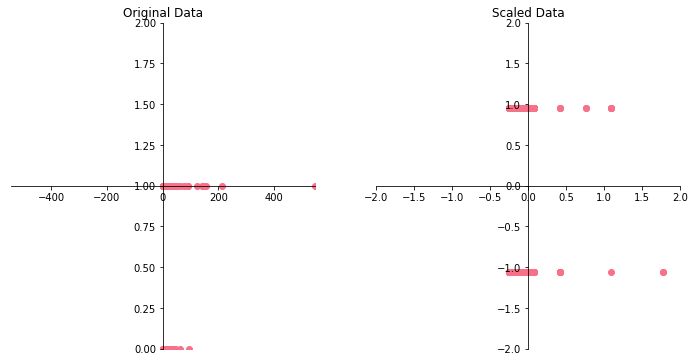

In [259]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["popularity"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["popularity"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [260]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

# PCA

In [261]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.svm import SVC

In [262]:
pca = decomposition.PCA(n_components = 2)

In [263]:
pca.fit(X_train_scaled, y_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [264]:
X_train_pca = pca.transform(X_train_scaled)

In [265]:
len(X_train_pca[0])

2

In [266]:
modelSVC = SVC(C=5, gamma=0.1, kernel='linear')

In [267]:
modelSVC.fit(X_train_pca, y_train)

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [268]:
X_test_pca = pca.transform(X_test_scaled)

In [269]:
X_test_pca

array([[-2.3285998 ,  1.01117219],
       [-0.48966896, -1.259668  ],
       [ 0.79533923,  2.22975363],
       ...,
       [ 0.40854412, -0.43684944],
       [-2.32175337,  0.07192996],
       [-1.78807356,  0.50751231]])

In [270]:
modelSVC.score(X_test_pca, y_test)

0.5840425531914893

In [272]:

modelSVC = SVC(C=5, gamma=0.1, kernel='linear')


for n in range(2,10):
    
    pca = decomposition.PCA(n_components = n)
    pca.fit(X_train_scaled, y_train)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    modelSVC.fit(X_train_pca, y_train)
    print("n="+str(n),modelSVC.score(X_test_pca, y_test),"")

C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=2 0.5840425531914893 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=3 0.7691489361702127 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=4 0.8521276595744681 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=5 0.8776595744680851 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=6 0.8840425531914894 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=7 0.8882978723404256 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=8 0.8829787234042553 


C:\Users\So Jung Lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


n=9 0.8882978723404256 


In [279]:
pca.explained_variance_

array([5.91765603, 2.37985045, 2.05118039, 1.76001338, 1.16751937,
       1.01701426, 0.96839769, 0.92942712, 0.8801705 ])

In [280]:
X_train_scaled

array([[-0.22903476,  1.56881398, -0.26249603, ...,  0.79747789,
         0.62938141, -0.11293428],
       [-0.22600066,  0.29410078, -0.34136865, ..., -0.06291859,
         0.62938141, -0.21409354],
       [-0.25364472, -0.64009402, -0.43226197, ...,  0.12828063,
        -0.69884327, -0.66133247],
       ...,
       [-0.24825076, -0.57890779, -0.39746523, ...,  0.22388023,
        -0.69884327, -0.12937109],
       [-0.23004613, -0.56403614, -0.3306133 , ..., -1.2101139 ,
         0.62938141, -0.70585809],
       [-0.25566746,  0.80398606,  2.72981325, ..., -1.01891468,
         0.62938141,  0.81835047]])

In [281]:
import numpy as np

In [289]:
i =np.identity(len(X_train_scaled[0]))
i

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [294]:
pd.DataFrame(pca.transform(i))

,0,1,2,3,4,5,6,7,8
0,0.142795,-0.046575,0.010097,-0.082484,-0.115905,-0.304237,-0.091815,0.410482,-0.800696
1,0.178205,0.434103,0.079351,-0.187046,-0.146432,-0.103633,0.155388,0.039384,0.052366
2,0.192279,0.430406,0.070592,-0.111222,-0.068376,-0.009380,-0.028772,-0.022540,0.058857
3,0.192138,0.325134,0.037966,-0.000136,0.079852,0.106043,-0.196992,-0.046425,-0.028508
4,0.222127,0.500799,0.083295,-0.164628,-0.107910,-0.063411,0.063899,0.012833,0.057551
5,0.270319,-0.019618,-0.022676,0.202658,0.071556,0.246141,0.164669,-0.100368,-0.195938
6,0.302967,-0.049412,-0.000873,0.230809,0.044179,0.130312,0.221708,-0.094129,-0.100758
7,0.296407,-0.128330,-0.045898,0.149637,0.078334,-0.205821,-0.101243,0.066801,0.082419
8,0.352887,-0.113051,-0.056570,0.152140,-0.038262,-0.041853,-0.075026,0.067990,-0.015111
9,0.214862,-0.207981,0.095138,-0.462341,0.282605,-0.131433,-0.142754,-0.033364,0.103764


In [285]:
modelSVC = SVC(C=5, gamma=0.1, kernel='linear')